## ***EXPLORATORY DATA ANALYSIS (EDA)***

## Importing all required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the .csv file

In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Getting Basic Information

Checking the size of dataset

In [3]:
df.shape

(17000, 9)

Reindexing the dataset

In [4]:
df.index = range(1,len(df) + 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
2,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
4,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


 # More basic information about dataset

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


More information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 1 to 17000
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Average of median house values of Houses with population greater than 750 (inclusive)

In [7]:
df[(df['population'] >= 750)]['median_house_value'].mean()

np.float64(205606.01734848483)

 Names of columns

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# Intoducing a new parameter : 'Number of rooms per Household'

In [9]:
df['room/household'] = df['total_rooms'] / df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room/household
1,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831
2,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678
3,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846
4,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593
5,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618


Calculating total null value rows

In [10]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
room/household,0


# Removing Outliners using IQR method

In [11]:
datas = ['median_income', 'median_house_value', 'households', 'population', 'total_bedrooms', 'total_rooms', 'housing_median_age', 'room/household']

for i in datas :
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df1 = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

df1.shape

(16589, 10)

Calculating number of outliners

In [12]:
outliners = len(df) - len(df1)
outliners

411

# An KDE Plot between "rooms per household" vs "total rooms"

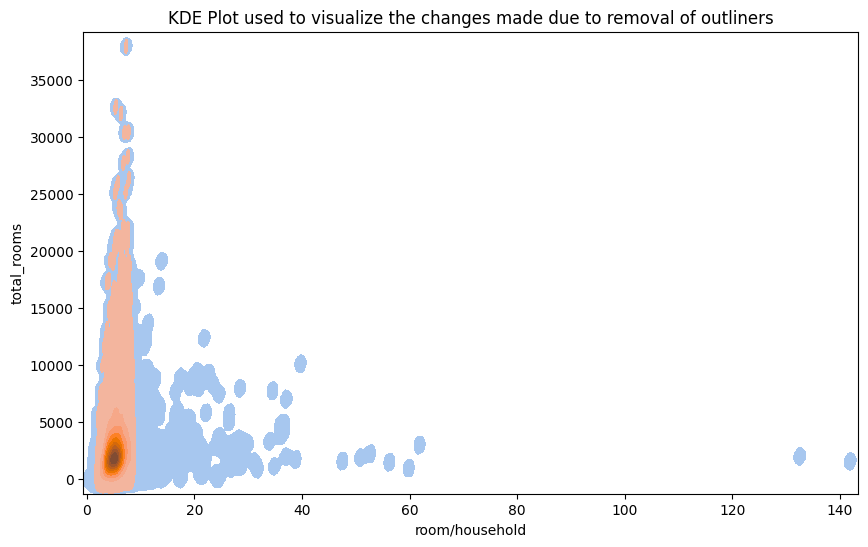

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='room/household', y='total_rooms', data=df, fill=True, thresh = 0.0005)
sns.kdeplot(x='room/household', y='total_rooms', data=df1, fill=True, thresh = 0.0005)
plt.title('KDE Plot used to visualize the changes made due to removal of outliners')
plt.show()

I have plotted this KDE Plot to compare pre & post conditions due to removal outliners using IQR method

# Histogram of "Housing Median Age" vs "Median Income"

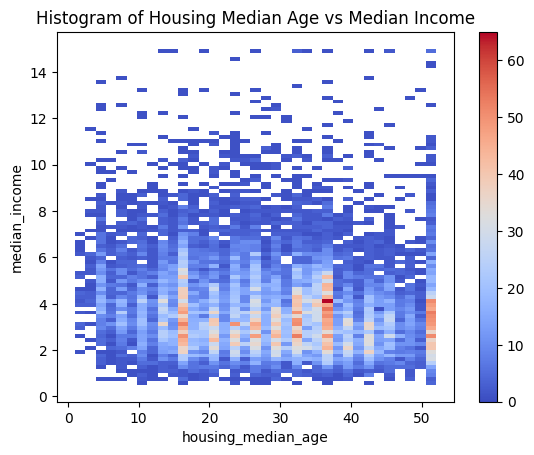

In [14]:
sns.histplot(x='housing_median_age', y='median_income', data = df1, cmap='coolwarm', cbar = True)
plt.title('Histogram of Housing Median Age vs Median Income')
plt.show()

I know it looks more like heatmap but its histogram

We may see that there is a major chunk of houses with median income betweeen 2 - 4

# Plotting a Regplot to observe trend of Housing Median Age w.r.t Median House Value

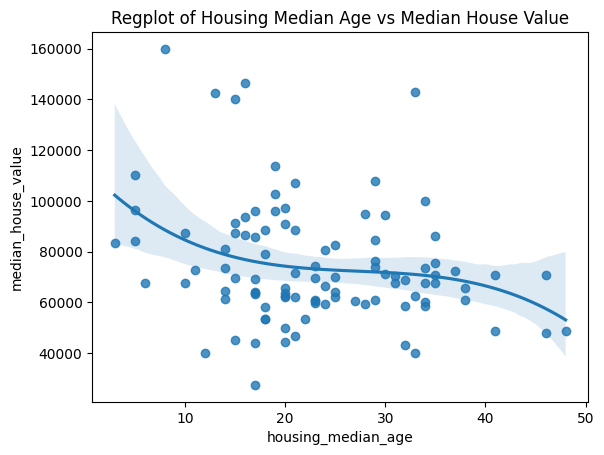

In [15]:
sns.regplot(x=df1['housing_median_age'].head(100) , y=df1['median_house_value'].head(100) , scatter=True, order = 3)
plt.title('Regplot of Housing Median Age vs Median House Value')
plt.show()

The Regplot shows median house value monotonically decreasing as median age of house increase

This implies that more newer the house more is its value or older the house lesser its value

# A Correlation matrix

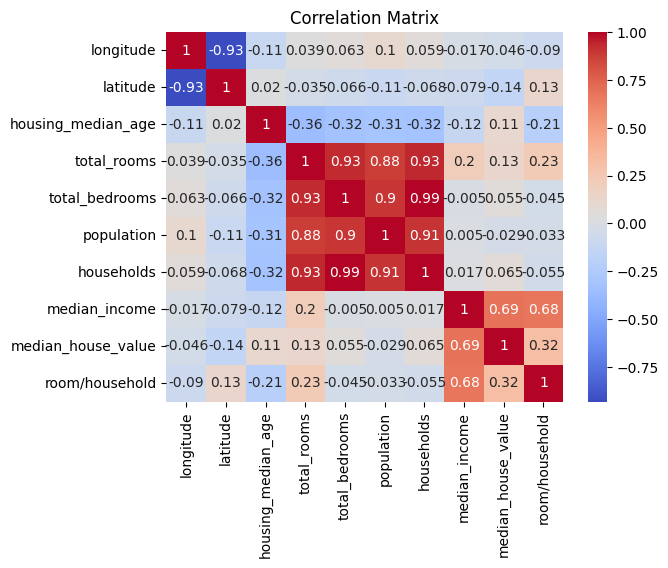

In [16]:
sns.heatmap(df1.corr(), cmap='coolwarm', cbar=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

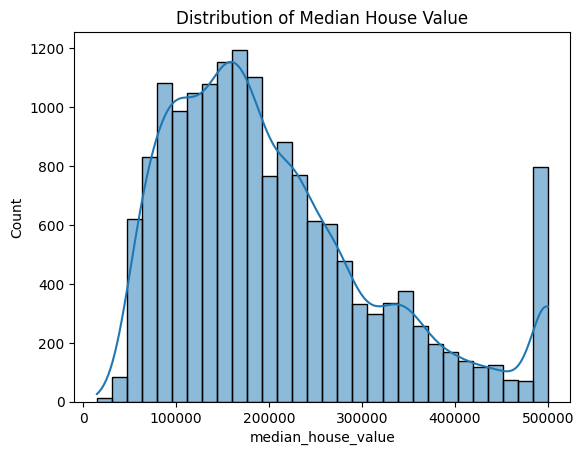

In [17]:
sns.histplot(df1['median_house_value'], kde=True, bins=30)
plt.title("Distribution of Median House Value")
plt.show()

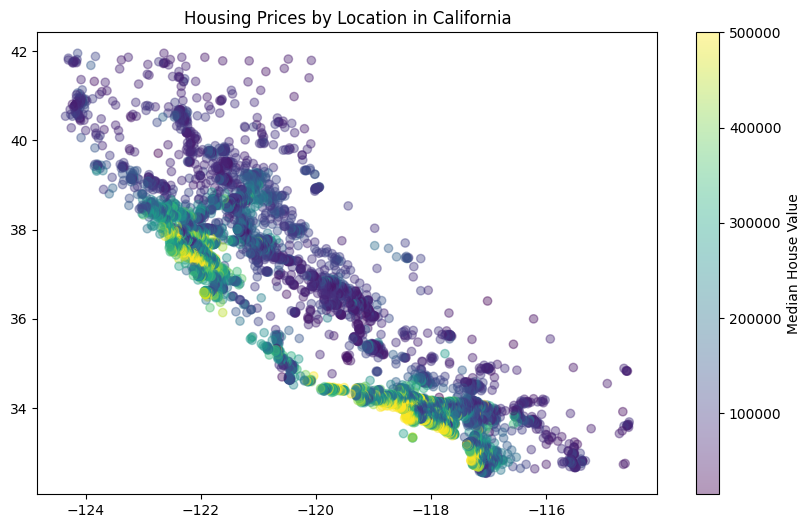

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['longitude'], df1['latitude'], c=df1['median_house_value'], cmap='viridis', alpha=0.4)
plt.colorbar(label='Median House Value')
plt.title('Housing Prices by Location in California')
plt.show()

Its not a geographical plot but gives idea of where are the major big cities in Calfornia:
- (33, -118) approximate
- (37, -122.5) approximate

In [43]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="median_house_value", color_continuous_scale="Portland", size_max=15, zoom=5, height=600, title="California Housing Prices on Map", opacity=0.5)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Location is written as (latitude, longitude)

# ***Machine Learning***

# Importing all libraries for prediction model

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

# Splitting dataset into training data (80%) & testing data (20%)

In [20]:
cols = ['population','total_bedrooms','room/household']
X = df1.drop(cols, axis=1)
y = df1['population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Transforming (Scaling)

In [21]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting and predicting model

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Importing joblib for hugging face

In [23]:
import joblib
joblib.dump(model, "model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Calculating R² score

In [24]:
R_squared = r2_score(y_test, y_pred)
print("R² score:", R_squared)

R² score: 0.8697896110349637


Calculating mean of R² score after cross validation

In [25]:
print(f"R² score after cross validation: {cross_val_score(model, X_train_scaled, y_train, cv=10).mean()}")

R² score after cross validation: 0.8503365669980848


In [26]:
with open("requirements.txt", "w") as f:
    f.write("gradio\nscikit-learn\nnumpy\njoblib")

In [27]:
import zipfile

with zipfile.ZipFile("California_app.zip", "w") as zipf:
    zipf.write("model.joblib")
    zipf.write("scaler.joblib")
    zipf.write("requirements.txt")

In [28]:
from google.colab import files
files.download("California_app.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>